# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ingrese la velocidad de la moto en m/s: 15
Ingrese la aceleración del policía en m/s²: 5
6.0


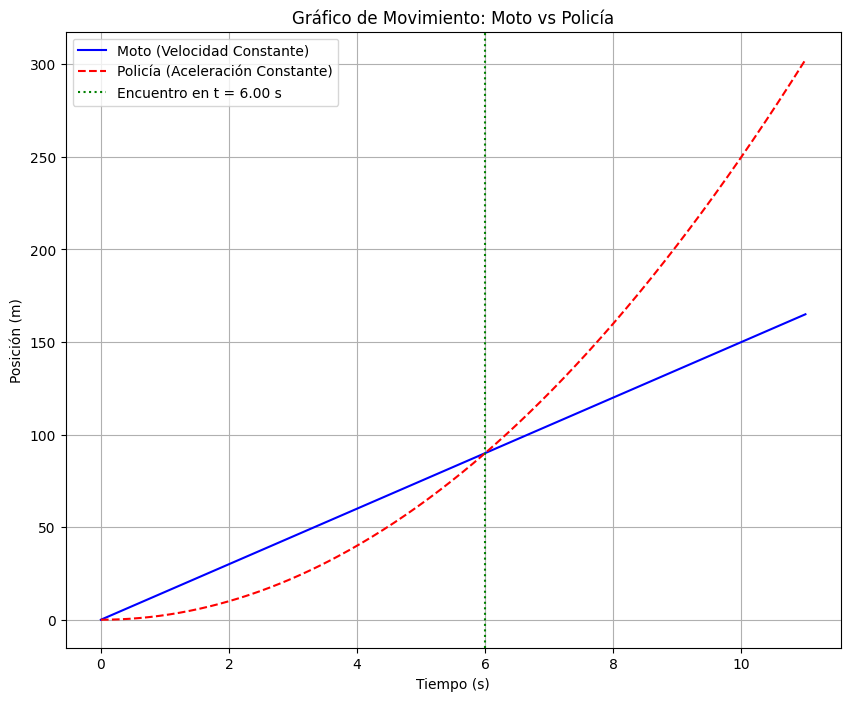

In [ ]:


Vm = float(input("Ingrese la velocidad de la moto en m/s: "))
ap = float(input("Ingrese la aceleración del policía en m/s²: "))

te = 2 * (Vm / ap)
print(te)

t = np.linspace(0, te + 5, 500)
#calculamos las posiciones suponiendo que ambos partieron en cero

xm=Vm*t
xt=0.5*ap*(t**2)

# Graficar
plt.figure(figsize=(10, 8))
plt.plot(t, xm, label='Moto (Velocidad Constante)', color='blue')
plt.plot(t, xt, label='Policía (Aceleración Constante)', color='red', linestyle='--')


plt.title('Gráfico de Movimiento: Moto vs Policía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.axvline(x=te, color='green', linestyle=':', label=f'Encuentro en t = {te:.2f} s')
plt.legend()
plt.grid(True)



2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


R= 1.123246492985972 posicion 41


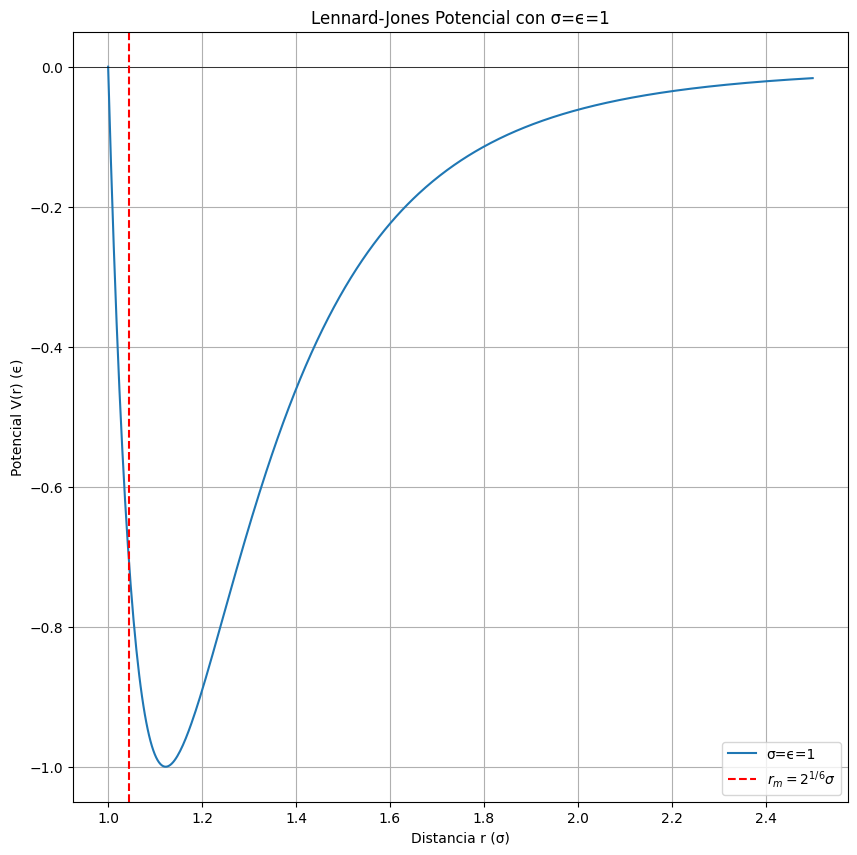

In [ ]:
def lennard_jones_potential(r, epsilon, sigma):
    term1 = (sigma / r)**12
    term2 = (sigma / r)**6
    return 4 * epsilon * (term1 - term2)

# Define parameters
sigma = 1
epsilon = 1
rc = 2.5 * sigma
r_values = np.linspace(sigma, rc, 500)

# Calculate the potential for the defined range of r
potential_values = lennard_jones_potential(r_values, epsilon, sigma)
l=np.argmin(potential_values)
r_min=r_values[l]
print("R=",r_min,"posicion",l)
# Plot the potential
plt.figure(figsize=(10, 10))
plt.plot(r_values, potential_values, label=f'σ=ϵ=1')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(2**(1/16) * sigma, color='red', linestyle='--', label=r'$r_m=2^{1/6}\sigma$')
plt.xlabel('Distancia r (σ)')
plt.ylabel('Potencial V(r) (ϵ)')
plt.title('Lennard-Jones Potencial con σ=ϵ=1')
plt.legend()
plt.grid(True)
plt.show()




array([0.        , 1.12312312, 2.24624625, 3.36936937, 4.49249249])

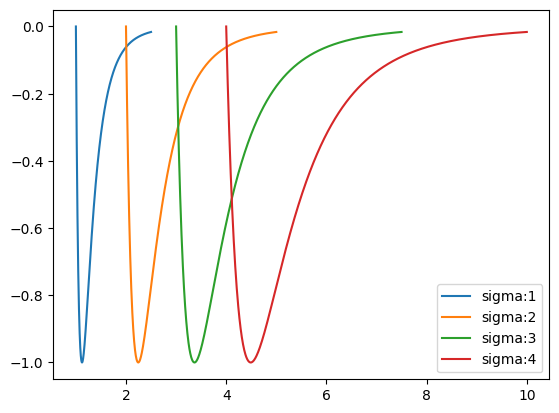

In [ ]:
minimos = np.zeros(5)
for i in range(1,len(minimos)):
  sigma = i
  rc = 2.5*sigma
  values = np.linspace(sigma, rc, 1000)
  potencial = lennard_jones_potential(values, epsilon, sigma)
  minimos_ = np.argmin(potencial)
  minimos[i] = values[minimos_]
  plt.plot(values,potencial, label = f'sigma:{i}')
  plt.legend()


minimos

El siguiente código exporta tablas html de sitios web

In [2]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en (in) y cambie todos los nombres al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset income, haga un merge con el dataset alturas. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.

In [6]:
import pandas as pd
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country" #Pueden presentarse cambios en la base de datos del url que alteren el funcionamiento del códifgo (lo digo porque la primera vez que lo corrí no habían dos columnas que ahora unos días después aparecen)
html_content = pd.read_html(url)
alturas = html_content[2]
alturas

,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,5 ft. 4 in.,5 ft. 2 in.,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,5 ft. 4 in.,5 ft. 2 in.,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,5 ft. 4 in.,5 ft.,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,5 ft. 3 in.,5 ft.,154.15,150.11,125.94,131.02,99.62,103.98


In [7]:
print(list(alturas.columns))

['Country', 'Average Height, Boys, 19 yo (cm)', 'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)', 'Boys 15 (cm)', 'Girls 15 (cm)', 'Boys 10 (cm)', 'Girls 10 (cm)', 'Boys 5 (cm)', 'Girls 5 (cm)']


In [8]:
print(alturas.head())
print(alturas.info())  # Para ver información general sobre el DataFrame


                  Country  Average Height, Boys, 19 yo (cm)  Girls 19 (cm)  \
0             Netherlands                            183.78         170.36   
1              Montenegro                            183.30         169.96   
2                 Estonia                            182.79         168.66   
3  Bosnia and Herzegovina                            182.47         167.47   
4                 Iceland                            182.10         168.91   

  Boys 19 (in) Girls 19 (in)  Boys 15 (cm)  Girls 15 (cm)  Boys 10 (cm)  \
0        6 ft.   5 ft. 7 in.        177.20         167.45        146.88   
1        6 ft.   5 ft. 7 in.        177.50         167.42        146.81   
2        6 ft.   5 ft. 6 in.        176.41         166.12        146.03   
3        6 ft.   5 ft. 6 in.        174.21         164.85        144.97   
4        6 ft.   5 ft. 7 in.        174.80         165.61        145.59   

   Girls 10 (cm)  Boys 5 (cm)  Girls 5 (cm)  
0         146.55       119.63     

In [12]:
print(list(alturas.columns))

['País', 'Niños 19 (cm)', 'Niñas 19 (cm)', 'Niños 15 (cm)', 'Niñas 15 (cm)', 'Niños 10 (cm)', 'Niñas 10 (cm)', 'Niños 5 (cm)', 'Niñas 5 (cm)']


In [15]:
mayores_b = alturas.nlargest(10, 'Niños 19 (cm)')
menores_b = alturas.nsmallest(10, 'Niños 19 (cm)')

mayores_g = alturas.nlargest(10, 'Niñas 19 (cm)')
menores_g = alturas.nsmallest(10, 'Niñas 19 (cm)')

colombia = alturas[alturas['País'] == 'Colombia']

may_g_Col = colombia.nlargest(10, 'Niñas 19 (cm)')
may_b_Col = colombia.nlargest(10, 'Niños 19 (cm)')

min_b_Col = colombia.nsmallest(10, 'Niños 19 (cm)')
min_g_Col = colombia.nsmallest(10, 'Niñas 19 (cm)')

In [16]:
ninos = pd.concat([mayores_b['Niños 19 (cm)'], colombia['Niños 19 (cm)']])
ninas = pd.concat([mayores_g['Niñas 19 (cm)'], colombia['Niñas 19 (cm)']])
countries_labels = pd.concat([mayores_b['País'], colombia['País']])

x = np.arange(len(countries_labels))
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ninos, width, label='Niños 19', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('Altura (cm)')
ax.set_title('Top 10 países más altos - Niños vs. Niñas')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, ninos, 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

z = np.polyfit(x, ninas, 1) #Línea de tendencia niñas
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [ ]:
# Dataset 2: Riqueza
url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content_income = pd.read_html(url_income)
income = html_content_income[0]

# Renombrar columnas
income.columns = ['País', 'Riqueza Media']

# Realizar el merge
merged = pd.merge(alturas, income, on='País')

# Filtrar los 10 mayores y menores en altura
mayores_altura = merged.nlargest(10, 'Niños (19 años)')
menores_altura = merged.nsmallest(10, 'Niños (19 años)')
data_final = pd.concat([mayores_altura, menores_altura])

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data_final['Riqueza Media'], data_final['Niños (19 años)'], color='blue', label='Niños (19 años)')
plt.scatter(data_final['Riqueza Media'], data_final['Niñas (19 años)'], color='pink', label='Niñas (19 años)')
plt.title('Relación entre riqueza media y altura')
plt.xlabel('Riqueza Media (USD)')
plt.ylabel('Altura Media (cm)')
plt.legend()
plt.show()


In [ ]:
correlation_ninos = data_final['Riqueza Media'].corr(data_final['Niños (19 años)'])
correlation_ninas = data_final['Riqueza Media'].corr(data_final['Niñas (19 años)'])
print(f'Correlación entre riqueza y altura de niños: {correlation_ninos}')
print(f'Correlación entre riqueza y altura de niñas: {correlation_ninas}')
